#### Lecture

* ML - computer program that accepts inputs and predicts target variable
* cost/penalty function monitored as moves through data
* corrects to minimize cost/penalty 

* randomize the data - then partition to get train/test sets 
* model should not be exposed to test until training is done

* Machine Learning 
    * supervised - labels are given 
        * Regression - continuous variables e.g. diff temperatures
        * Classification - categorical e.g. hot/cold. logistic regression
    * unsupervised - labels are not given
        * clustering - recommender systems, targeted marketing, customer segmentation
        * generative networks - more deep learning
        * dimension reduction - for structure discovery and big data visualization
    * semi supervised - mix 
    * reinforcement learning - skill acquisition
    * "inference learning"
        * induction - learning general model from specific
        * deducation - using a model to make predictions
        * specific examples to make predictions 

#### Unsupervised Learning
* product recommendations, fraudulent cases, insurance risk models, social media (friend suggestions), drug trials/genetic markers
* clustering based on a 'centroid'/distribution
* also includes KDE (kernel density estimation)
* PCA principal component analysis, can also visualize
* [clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
<br>

1. K-Means Clustering 
* 'base' model - more simple and the basis of other clustering techniques
* K = number of clusters you are using
* finds centroid for number of clusters 
* takes k number of randomly selected points - gets mean from those clusters - taken as new centroid - compare values between centroids 
* reassigns points to new cluster depending on how far those points are from the new centroid 
* good for spherical clusters
* Short-comings
    * convergence is not guaranteed - scikit learn by default uses a large number of random initializations to find the best results
    * number of clusters must be set beforehand - other clustering algorithms don't 
* how well clustered: inertia - sum of squares difference from the centroid - because some can be classified to a different one after one run
* can be more 1-3 dimensions - but usually not more, because based on some euclidean distance 

2. Hierarchical Clustering 
* each point is a cluster -> take two closest as a cluster -> repeats until only one cluster
* Dendrogram - visualize the number of clusters you should go for
* goes through how each individual point is getting linked 
* 'agglomerative' 
* linkage can be based on - two closest points min distance 'single', furthest distance 'complete', or through average 

3. DBScan - Density-Based Spatial Clustering Applications with Noise
* sphetical and arbitrary shape clusters (donut wtih hole)
* e.g. for smiley face 
* no k input - figures tricky shapes based on it
* based on radius of neighbourhood "R" or epsilon
* "M" minimum number of neighbours - to get a corepoint - to get minimum number of points
* collects/connects core-points near by with set 'M' - 
* robust to outliers
* can have noise points - no corepoints nearby to make it into that cluster

#### Compass/Readings

* Clustering
    * dividing a population/data points into several groups so that the data in same groups are more similar to each other than those in other groups
    * segregate groups with similar traits - to assign to clusters
    * can have many uses, data reduction, finding natural clusters, outlier detection

* Methods:
    * density-based methods 
        * DBSCANs/OPTICS
        * dense regions having some similarities/differences from lower dense region of the space
        * can merge two clusters
    * Hierarchical
        * tree type structure - clusters formed from previous
        * can be: (1) agglomerative - bottom-up (2) Divisive - top down
    * Partitioning
        * partition into k-clusters, and partition form a cluster
        * K-means, CLARANS (clustering large applications based on randomized search)
    * Grid-based methods
        * data space is formulated into a finite number of cells for a grid like structure
        * fast and independent on the number of data
        * e.g. are STING, wave cluster, CLIQUE

* **K-means**
    * observations belongs to a cluster, nearest mean is the prototype of the cluster
    * used in marketing, bio, libraries, insurance, city planning,
    * a centroid-based clustering
    * centroid = central vector - not necessarily part of the dataset 
    * important to scale your data - if they are on different scales - e.g. age vs income one var will have a bigger impact to the model. 
    * does multiple k-runs and returns best with least variation within each cluster
    * 'elbow plot' to see at what k is there no big improvements in reducing variance w/ in clusters
    * 2 variables - euclidean distance/hypoteneuse 
    * 3 variables - sqrt x^2 + y^2 + z^2 - similar euclidean distance
    * L2 distance or euclidean distance

    * steps: 
        * Initialize Cluster Centroids (Choose those 3 books to start with)
        * Assign datapoints to Clusters (Place remaining the books one by one)
        * Update Cluster centroids (Start over with 3 different books)
        * Repeat step 2–3 until the stopping condition is met. 

    * assign a stopping criterion or some conditions met:
        * datapoints remain the same (too long)
        * centroids remain the same (too long)
        * distance of datapoint from centroid is minimum (set thresh)
        * number of iterations reached (set)

    * cluster quality:
        * inertia - how far away the points within the cluster are, smaller the better, 0 means no variance, sum of squares of variance(?)
        * silhouette score - how far the datapoints in one cluster are from data in another cluster -1 to 1, 1 is better, meaning further apart 

    * choosing k
        * eyeballing - looking at the data 
        * use inertia - graphed with increasing ks, choose a k where change in value isn't significant anymore 
        
    * name the clusters, and can be used to assign new data points 

In [1]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [2]:
# create blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

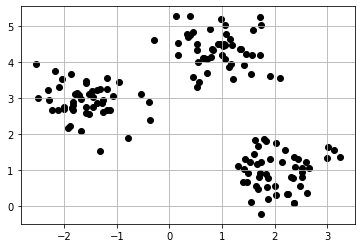

In [3]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [4]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs or seeds
            random_state=0)

In [5]:
# note that may have to scale features if not from the same distribution, random_state to reproduce the results
# fit and predict are two separate methods can be run separately
# fit - creates model using the dataset in the argument of the function
# predict - predicts the cluster for every row of data set in the argument function
y_km = km.fit_predict(X)

In [6]:
 # create a function to plot how the k-means alg assigned the clusters 
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

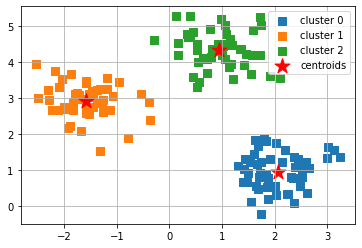

In [7]:
plot_clusters(X, y_km, plt_cluster_centers= True)

In [8]:
# distortion plot, called inertia in sklearn
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

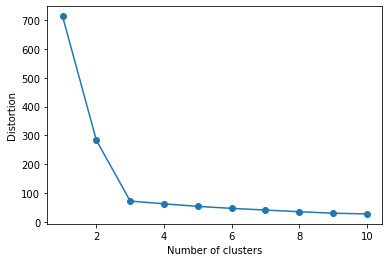

In [9]:
plot_distortion(X,max_clusters=10)

* **Hierarchical Clustering** 
    * connects nearby objects to form clusters with maximum distance to connect parts of the cluster
    * repped with a dendrogram, providing a hierarchy of clusters that merge at different distances
    * y = distance clusters merge, x objects 
    * can be bottom up (agglomerative), or top down (divisive)
    * start with data points as own cluster - join closest clusters
    * Euclidean space - clusters are represented as centroid - average of its pointness
    * distance to centroid = measure of distance between clusters or nearness 

    * non-euclidean space
        * not based on distance from centroids, and using centroids 
        * no "average"
        * based on: "clustroids"
        * clustroid chooses one of the **existing** data points in the cluster that is closest to all the other points in the cluster
        * can be treated as a centroid
        * closest can mean: smallest maximum distance, average distance to other points, smallest sum of squares distance 
    
    * termination condition
        * when to stop
        * pick k upfront - if known
        * if unknown - keep clustering until low cohesion ('bad' cluster)
            * 1. diameter of merged clusters reaches a max distance between points 
            * 2. radius - maximum distance of a point from centroid 
            * 3. density based approach - number of points per unit volume (density) 
                * e.g. divide number of points by diameter/radius 

    * implementation
        * at each step - gets pairs of clusters - compute pairwise distances and then merge
        * can be memory intensive and slow with large data 

In [13]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


In [14]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [16]:
# create an object for clustering
# linkage can be: 'ward' - minimum sum of squared difference w/in clusters similar to k-means of minimizing variance
# 'maximum' - minimize maximum distance between observations of pairs of clusters
# 'average' - minimize average distance between observations of pairs of clusters
# 'single' - minimize the distance b/w closest observations of pairs of clusters  
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [17]:
y_hc = ac.fit_predict(X)

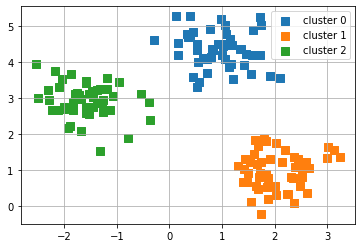

In [18]:
# no difference from k-means
plot_clusters(X,y_hc)

In [19]:
# check with dendrogram
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

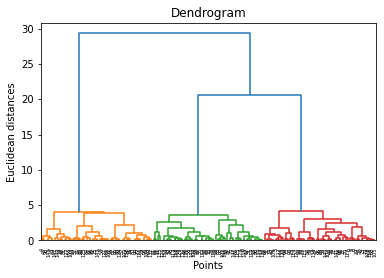

In [20]:
plot_dendrogram(X)

#### DBSCAN
* density-based spatial clustering of applications with noise
* separate high density from low density
* not dependent on spherical data - can have detect other shapes
* epsilon - radius of the cluster
* minimum points - points in a cluster
* core (has minimum), border (part of a core's cluster, but doesn't meet minimum), outlier (no minimum, and not connected to a cluster)
* 1. pick a random point that has yet to be decided -> check if core point (meets minimum) -> if not, label as outlier
* 2. from a core - add all reachable to its cluster, then do neighbour jumps to each reachable point, add them to the cluster, once outlier is reached, labeled as border point
* 3. repeat until all points are assigned to a cluster or outlier 
* care with use, sparse data are treated as outliers even though they can still be part of a cluster

* vs k-means
    * DBSCAN doesn't use entire data set
    * can detect non-spherical 


In [21]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.grid()
    plt.show()

In [22]:
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [36]:
# eps - maximum distance between two samples to be considered as being in the neighbourhood
# min_samples - number of samples in a neighborhood for apoint to be considered as a core
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')


In [38]:
print(db)

DBSCAN()


In [24]:
y_db = db.fit_predict(X)

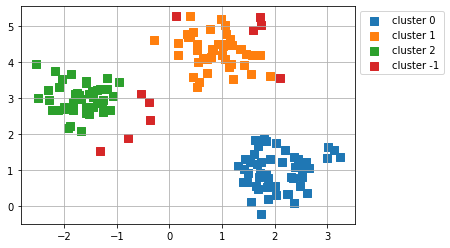

In [25]:
plot_clusters(X,y_db)

In [26]:
# Non spherical data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

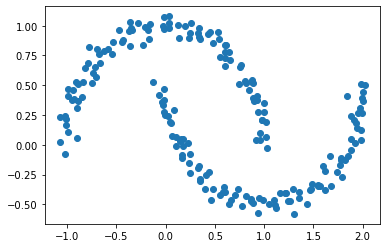

In [27]:
plt.scatter(X[:,0], X[:,1])
plt.show()


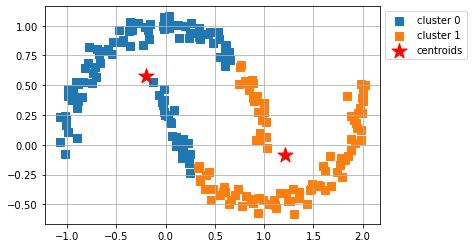

In [28]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)

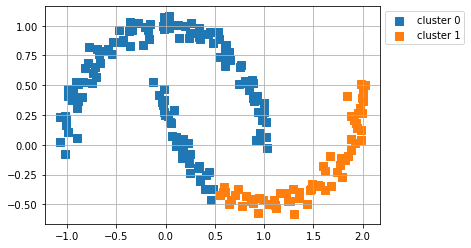

In [29]:
# with hierarchical - agglomerative
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)

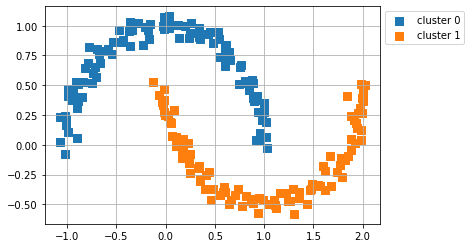

In [30]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)
